<a href="https://colab.research.google.com/github/NadiaCopello/HW6/blob/main/hw6_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

device_name = tf.config.list_physical_devices('GPU')
print("GPU disponible:" if device_name else "NO hay GPU disponible")
print(device_name)



GPU disponible:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from tensorflow.keras.datasets import fashion_mnist

# Cargar los datos
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalizar los datos (escalar de 0 a 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Añadir una dimensión para canales (porque es una imagen en escala de grises)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [4]:
#DEFINO UN MODELO :
#Opción A: Modelo con capas Dense (simple)
from tensorflow.keras import models, layers

def build_dense_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [5]:
#DEFINO UN MODELO :
#Opción B: Modelo con capas CNN (más preciso)
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model


In [6]:
# Ahora lo entreno el modelo con CPU
import time

# Forzar el uso de CPU
with tf.device('/CPU:0'):
    model_cpu = build_dense_model()
    model_cpu.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    start = time.time()
    history_cpu = model_cpu.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)
    cpu_time = time.time() - start
    print(f"⏱ Tiempo en CPU: {cpu_time:.2f} segundos")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7804 - loss: 0.6332 - val_accuracy: 0.8532 - val_loss: 0.4175
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8603 - loss: 0.3918 - val_accuracy: 0.8655 - val_loss: 0.3755
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8757 - loss: 0.3464 - val_accuracy: 0.8737 - val_loss: 0.3452
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8820 - loss: 0.3191 - val_accuracy: 0.8672 - val_loss: 0.3548
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8872 - loss: 0.3019 - val_accuracy: 0.8805 - val_loss: 0.3330
⏱ Tiempo en CPU: 26.51 segundos


In [7]:
# Ahora con el modelo de GPU
with tf.device('/GPU:0'):
    model_gpu = build_dense_model()
    model_gpu.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    start = time.time()
    history_gpu = model_gpu.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=1)
    gpu_time = time.time() - start
    print(f"⏱ Tiempo en GPU: {gpu_time:.2f} segundos")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7765 - loss: 0.6489 - val_accuracy: 0.8562 - val_loss: 0.4126
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8559 - loss: 0.3963 - val_accuracy: 0.8677 - val_loss: 0.3703
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8774 - loss: 0.3379 - val_accuracy: 0.8638 - val_loss: 0.3685
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8855 - loss: 0.3113 - val_accuracy: 0.8783 - val_loss: 0.3323
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8911 - loss: 0.2941 - val_accuracy: 0.8785 - val_loss: 0.3286
⏱ Tiempo en GPU: 30.82 segundos


In [8]:
#ahora lo comparo
print(f"⏱ Tiempo total entrenamiento en CPU: {cpu_time:.2f} segundos")
print(f"⏱ Tiempo total entrenamiento en GPU: {gpu_time:.2f} segundos")


⏱ Tiempo total entrenamiento en CPU: 26.51 segundos
⏱ Tiempo total entrenamiento en GPU: 30.82 segundos


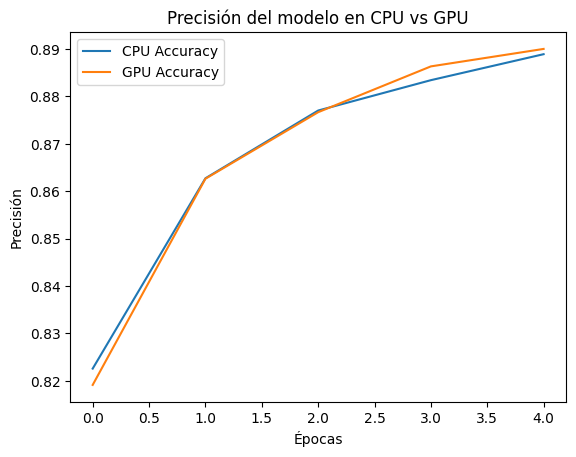

In [9]:
#para una mejor visualización
import matplotlib.pyplot as plt

plt.plot(history_cpu.history['accuracy'], label='CPU Accuracy')
plt.plot(history_gpu.history['accuracy'], label='GPU Accuracy')
plt.title('Precisión del modelo en CPU vs GPU')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

